## Reflectancia difusa para la detección de tejidos tumorales


La espectroscopía de reflectancia difusa permite obtener información relevante de muestras biológicas de forma no invasiva. La idea básica se muestra en la Fig.1. Se envía un haz de luz de cierto contenido espectral, por ejemplo, luz blanca, y se analiza la luz retrodifundida por el tejido. 

<img src="figrefpiel_1.png" style="max-width:100%" />

Se obtiene así un espectro de reflectancia $R(\lambda)=I_R(\lambda)/I_0(\lambda), donde $I_0(\lambda)$ e $I_R(\lambda)$ representan la intensidad incidente y reflejada difusa, respectivamente. No referimos a esta reflectancia como reflectancia difusa debido a que la luz o radiación que emerge del tejido ha experimentado muchos eventos de absorción y scattering por las moléculas y estructuras celulares que constituyen el mismo. En su camino cada componente de haz incidente se desviará de su trayectoria y será parcial o totalmente absorbido. Los cambios experimentados por las diferentes componentes espectrales de la luz incidente llevarán información del tipo y de la concentración de moléculas en el tejido y de los tamaños de las estructuras que lo componen.

El montaje típico se muestra en la figura: una fuente de luz blanca ilumina un mazo de fibras  compuesta de una fibra centrar que transporta la radiación hasta el tejido,

<img src="figrefpiel_3.png" style="max-width:100%" />



La reflectancia difusa de  un tejido contiene informaciónsobre la variación bioquímica y estructural que ocurre enun tejido cuando progresa  u proceso patológico como por ejemplo el cáncer. Poe eloo se puede emplear en el diagnóstico de diferentes tenfermedades incluyendo el cancer de mama [3–5], cáncer cervical [6], cancer oral [7–9],cancer de colon r [10], cancer de piel [11], camcer de higado[13],  cancer de próstata  [14], y esófago de Barret [15]. 

??**REFERENCIAS**??

Es preciso notar que el tejido experimenta cambios bioquímicos y morfológicos debido a las alteraciones metabólicas, genómicas y proteómicas de las células cacerosas. Durante la transformación de normal a cancerosos taparecen cambios  tales como angiogénesis, variación en el nivel deoxígeno en sangre, aumento en el tamaño de los núcleos y de la ration nucleo/citoplasma, aumento del número de mitocondria que afectan a las propiedades ópticas del tejido.Estos cambios pueden se r aprovechados para discriminar entre tejido normal y canceroso.

La extracción de las propiedades ópticas del tejido se puede llevar a cabo mediante procedimientos de ajuste de modelos teóricos analíticos  (ecuación de ldifusión, y modelo de  Kubelka Munk) y métodos numéricos tales como emétodos inversos de  Monte Carlo.


<img src="figrefpiel_2.png" style="max-width:100%" />




## Modelo de absorción, scattering y reflectancia para la piel

Vamos a aplicar el esquema anterior al caso de  una medida de reflectancia difusa de la piel. Se asume que las sustancias absorbentes relevantes en el higado son la sangre, con una fración en volume **fs**, la bilirrubina, con una fracción **fB** y   **W** la fracción del agua. A su vez, la sangre se compone de hemoglobina y oxihemoglobina, con una fraccion de oxigeno en sangre dada por **S**. El  coeficiente de absorción total para el higado.

###  Coeficiente de absorción de la piel

<img src="figrefpiel_4.png" style="max-width:100%" />

El coeficiente de absorción de la piel, teniendo en cuenta lo comentado anteriormente, toma la siguiente expresión,

$$\mu_a(\lambda)= f_s\left[S\mu^{ox}_a(\lambda)+ (1-S)\mu^{Hem}_a(\lambda)\right]+ f_{B}\mu^{B}_a(\lambda)
+f_{WL}\left[f_L \mu^{L}_a(\lambda)+ (1-f_L)\mu^{Agua}_a(\lambda)\right]$$

###  Coeficiente de scattering de la piel

En un tejido biológico existen una gran variedad de estructuras (núcleos celuares células, fibras de colágeno, estructuras  lipídicas...) cuyos tamaños varían desde los nm hasta las  10 o 20 micras. 

<img src="figrefpiel_5.png" style="max-width:100%" />

Ello hace que debamos formular un modelo de scattering que incluya el scattering Rayleigh y el Mie:

$$\mu'_s(\lambda)= a \left[f_R \left(\frac{\lambda}{\lambda_0} \right)^{-4 }  +(1-f_R) \left(\frac{\lambda}{\lambda_0} \right)^{-b }\right]$$


##  Esquema del procedimiento de ajuste no lineal

Una vez formulado el modelo de absorción y de scattring para el tejido en cuestión, debemos realizar un ajuste entre los datos de la reflectancia experimental y la reflectancia que suministra enl modelo teórico, a partir de unos valores semilla que incorporaremos al programa para que se inicie la compración. 

<img src="figrefpiel_6.png" style="max-width:100%" />

### Algoritmo de inversion

Los parámetros libres del modelo de tejido de higado, se pueden obtener mediante un ajuste inverso.  El diagrama de flujo del programa se muestra en la figura de arriba. Los pasos para realizar el programa son:

* Paso 1: Se introducen unos valores iniciales para los parámeros desconocidos , **fRay,b, B, S, fWL, fL**.

* Paso 2: Se cargan los espectros de absorción de los componentes y se calcula el coeficiente de absorción del tejido y el coeficiente de scattering a partir de las ecuaciones indicadas anteriormente.

* Paso 3: Se lleva a cabo una búsqueda del mínimo de la funcion error entre el modelo teórico y la reflectancia experimental con el comando fminsearch de matlab.De este ajuste, se optienen los parámetros del tejido.

El siguiente programa realiza estos pasos para obtener los valores de los parametros optimos que ajusta el espectro de reflectancia difusa de la piel con el modelo teorico propuesto a las medidas experimentales.



Optimization terminated successfully.
         Current function value: 0.000548
         Iterations: 1500
         Function evaluations: 2300


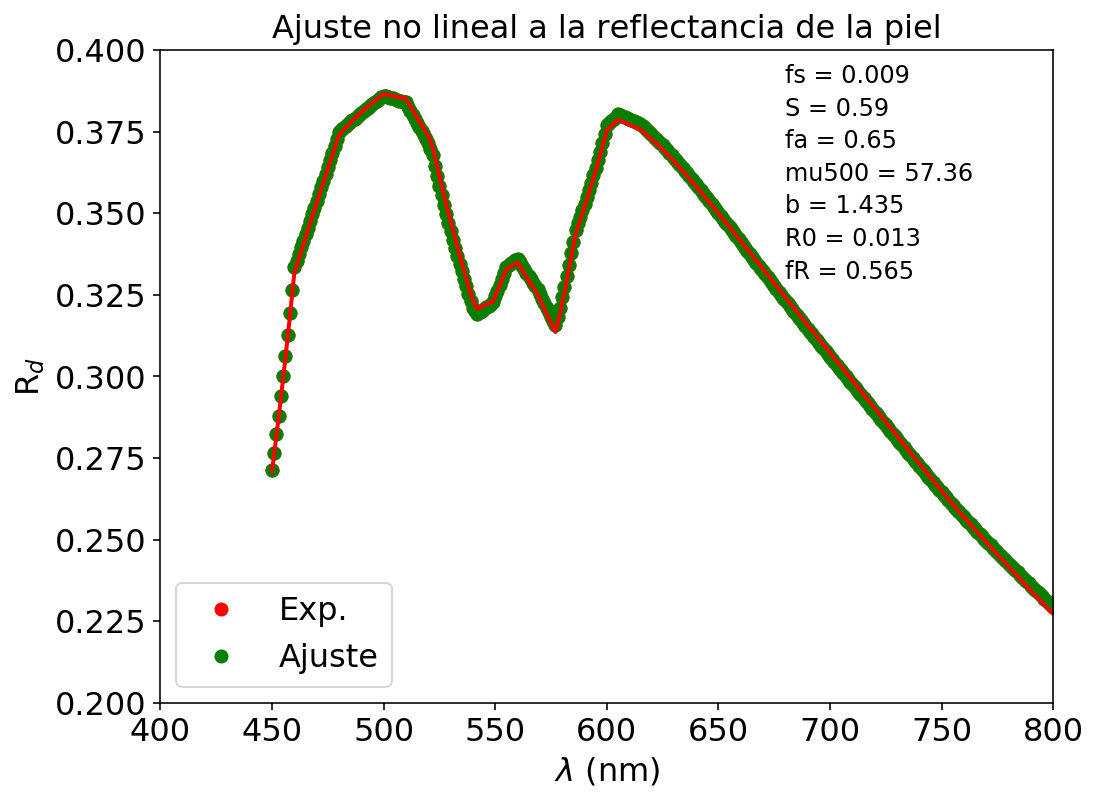

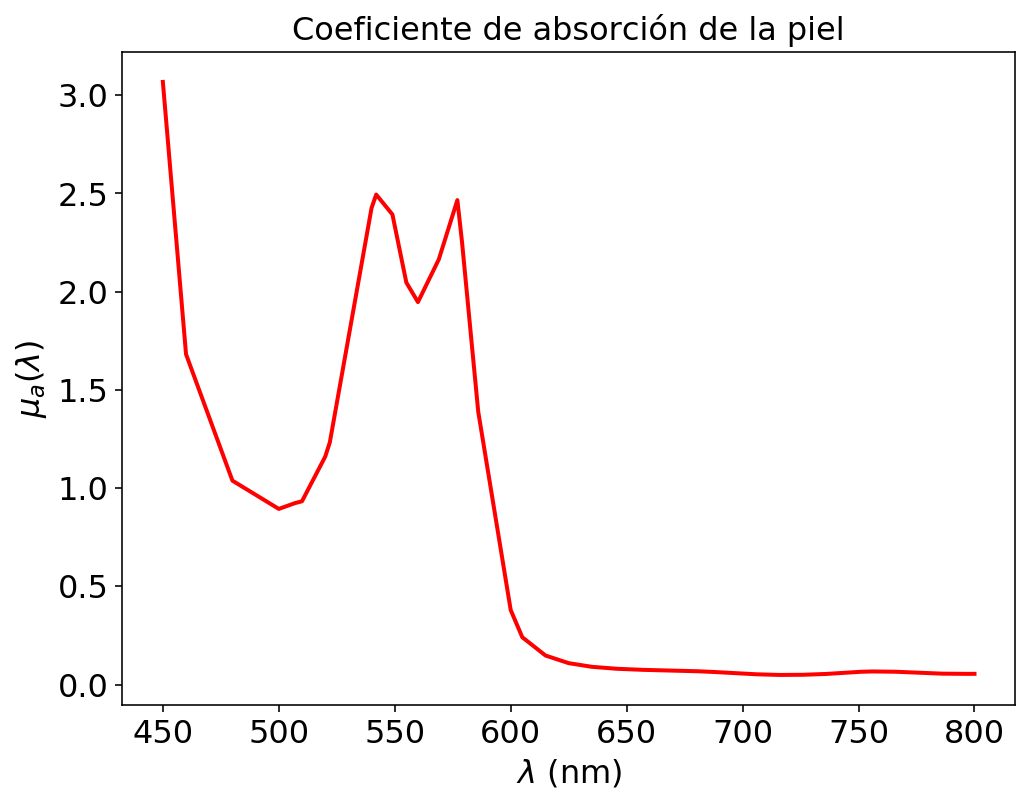

In [1]:
# ######################################################################## 
# PROGRAMA_GENERAL
# USA FUNCIONES: funcionerror_piel400_Mie_Ray
#
# El programa ajusta el espectros de reflectancia difusa de la piel 
# a un modelo descrito en la función funcionerror_piel400_Mie_Ray
#--------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin
#-----
cnt = 0
  
# 1.CARGA ESPECTRO DE REFLECTANCIA EXPERIMENTAL
#--------------------------------------------------------------------------

A=np.loadtxt('piel2_400.dat') 
landas_exp = A[:,0]
Rpiel_exper = A[:,1]
fig = plt.figure(figsize=(8,6))
plt.plot(landas_exp, Rpiel_exper,'ro',linewidth=1)
plt.xlabel('$\lambda$ (nm)',fontsize=16)
plt.ylabel('$R_{exp}(\lambda)$',fontsize=16)
plt.title('Reflectancia experimental de la piel',fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

#--------------------------------------------------------------------------#
# 2.CARGA LOS ESPECTROS DE ARCHIVO DE SANGRE Y AGUA                         # 
#--------------------------------------------------------------------------#
B=np.loadtxt('SANGRE.dat')                   #Coeficiente de absrocion Molar(oxy, deoxy)
landas_sangre = B[:,0]                 #carga las longitudes de onda en nm
muaoxySG = np.log(10)*B[:,1]*150/64500    #coeficiente de absorcion lineal de la oxihemoglobina
muadeoxySG = np.log(10)*B[:,2]*150/64500  #coeficiente de absorcion lineal de la Dexoxihemoglobina

C=np.loadtxt('AGUA.dat')                     #coeficiente de absorcion lineal del agua
landas_agua = C[:,0]                   #longitudes de onda en nm
muaH2O = C[:,1]                        #espectro de la Dexoxihemoglobina
#----------------------------------------------------------------------------------
muamel = 6.6e11*landas_exp**(-3.33)

#--------------------------------------------------------------------------#
# FUNCIÓN ERROR                        # 
#--------------------------------------------------------------------------#
def error_piel(valores_ini, landas_exp,  Rpiel_exper, landas_sangre, muaoxySG, muadeoxySG, landas_agua, muaH2O,cnt):
    
    
    cnt = cnt + 1  #contador de las iteraciones (para representar)
    GRAPH = 1 # 1 = ON, 0 = OFF

    fs= valores_ini[0]
    S= valores_ini[1]
    Mel= valores_ini[2]
    mu500= valores_ini[3]
    fR= valores_ini[4]
    b= valores_ini[5]
    R0= valores_ini[6]

    ###########################################################################
    # MODELO DE ABSORCION DE LA HEMOGLOBINA, OXIHEMOGLOBINA, AGUA Y MELANINA  #
    ###########################################################################

    #ESPECTROS INTERPOLADOS A 'landas_0'
    muaoxy = np.interp(landas_exp,landas_sangre, muaoxySG)
    muadeoxy = np.interp(landas_exp,landas_sangre, muadeoxySG)
    muawater = np.interp(landas_exp,landas_agua, muaH2O)
    muamel = 6.6e11*landas_exp**(-3.33)

    #TRANSMITANCIA DE LA CAPA DE MELANINA DE LA EPIDERMIS
    Lepi = 0.0060*2 # espesor de la capa de melanina x(dos veces recorrida)
    Tepi = np.exp(-Mel*muamel*Lepi)

    #COEFICIENTE DE SCATTERING MIE+RAYLEIGH
    musp = mu500*(fR*1/(landas_exp/500)**4+ (1-fR)*1/(landas_exp/500)**(b))
    #----------------------------------------------------------------

    # COEFICIENTE DE ABSORCIóN TOTAL: Agua+Melanina+Sangre
    mua  = fs*(S*muaoxy + (1-S)*muadeoxy) + fa*muawater # 'fs'  'S' y 'fa' son parómetros libres 
    #------------------------------------------------------------

    # MODELO TEORICO DE REFLECTANCIA DIFUSA
    r = 0.04  # separación entre las fibras
    n = 1.4  # indice de refracción relativo
    A=1
    #------------------------------------------------
    zo = 1/(mua + musp)
    D = zo/3
    delta = np.sqrt(D/mua)
    r1 = np.sqrt(zo**2 + r**2)
    r2 = np.sqrt((zo + 4*A*D)**2 + r**2)
    mueff = 1/delta
    c = zo*(mueff + 1/r1)*np.exp(-r1/delta)/(r1**2)
    d = (zo + 4*A*D)*(mueff + 1/r2)*np.exp(-r2/delta)/(r2**2)

    Rdifusa_teorica = R0*Tepi*( c + d )/(4*np.pi)

    ###################################################
    #Definición de la función error_piel
    ######################################################
    err = sum( (Rdifusa_teorica - Rpiel_exper)**2 )  # funcion error que se quiere minimizar en todo el intervalo espectral
    #err2 = sum( ((Rdifusa_teorica(v) - Rpiel_exper(v)))**2) # funcion error que se quiere minimizar en el intervalo reducido
    #err  = err1 # funcion error total que se quiere minnimizar en todo el intervalo espectral
    #----------------------------------------------------------

    #-----------Condiciones para el ajuste:------------------------
    # Se pueden aóadir constricciones impuestas a los posibles valores de las constantes
    #------------------------------------------------------------
    if (Mel<0   ):
        err = err*10 # rebaja las exigencias de precesión al dar una locura (S>1 no puede ser)
    if (S>1 ):
        err = err*10 # rebaja las exigencias de precesión al dar una locura (S>1 no puede ser)
    if (S<0.0): 
        err = err*10 
    return err

#VALORES DE PARTIDA APROXIMADOS PARA REALIZAR EL AJUSTE
#-----------------------------------------------------------------------
fs =0.01       # Fracción en volumen de sangre en la piel
S = 0.8        # Saturación de oxigeno en sangre(mezcla de sangre arterial y venosa)
Mel =0.0001    # Fracción en volumen de melanosomas en una epidermis de 60-um.
mu500=50       # Coeficiente de scattering para l=500nn en cm-1
fR=0.4         # Fracción de scattering Rayleigh
b=1.2          # Pendiente Mie
fa=0.65        # Fracción en volumen de agua
R0= 0.02       # const .  Rd= R0* F(teoría)
valores_ini=[fs, S, Mel, mu500, fR, b, R0]
#options=optimset('TolX',1e-8,'TolFun',1e-12,'MaxIter',100000,'MaxFunEvals',100000)
result = fmin(error_piel, valores_ini, args=(landas_exp, Rpiel_exper, landas_sangre, muaoxySG, muadeoxySG, landas_agua, muaH2O,cnt),
             xtol=1e-8,maxiter=4000,maxfun=10000)
     
#--------------------------------------------------------------------
#   Pintamos las soluciones finales
#--------------------------------------------------------------------
muaoxy = np.interp(landas_exp, landas_sangre,muaoxySG)
muadeoxy = np.interp(landas_exp, landas_sangre, muadeoxySG)
muawater = np.interp(landas_exp, landas_agua, muaH2O)
muamel = 6.6e11*landas_exp**(-3.33)

#-----Resultados finales del ajuste----------------------------------
fs=result[0]
S=result[1]
Mel=result[2]
mu500=result[3]
fR=result[4]
b=result[5]
R0=result[6]
 
#TRANSMITANCIA DE LA CAPA DE MELANINA DE LA EPIDERMIS
Lepi = 0.0060*2 # espesor de la capa de melanina x(dos veces recorrida)
Tepi = np.exp(-Mel*muamel*Lepi)

#COEFICIENTE DE SCATTERING MIE+RAYLEIGH
musp = mu500*(fR*1/(landas_exp/500)**4+ (1-fR)*1/(landas_exp/500)**(b))
#----------------------------------------------------------------

# COEFICIENTE DE ABSORCIÓN TOTAL: Agua+Melanina+Sangre
mua  = fs*(S*muaoxy + (1-S)*muadeoxy) + fa*muawater # 'fs'  'S' y 'fa' son parámetros libres 
#------------------------------------------------------------
# MODELO TEORICO DE REFLECTANCIA DIFUSA
r = 0.04  # separación entre las fibras
n = 1.4  # indice de refracción relativo
A=1
#------------------------------------------------
zo = 1/(mua + musp)
D = zo/3
delta = np.sqrt(D/mua)
r1 = np.sqrt(zo**2 + r**2)
r2 = np.sqrt((zo + 4*A*D)**2 + r**2)
mueff = 1/delta
c = zo*(mueff + 1/r1)*np.exp(-r1/delta)/(r1**2)
d = (zo + 4*A*D)*(mueff + 1/r2)*np.exp(-r2/delta)/(r2**2)

Rdifusa_teorica = R0*Tepi*( c + d )/(4*np.pi)

#----------------------------------------------
plt.plot(landas_exp, Rpiel_exper, 'go')
plt.plot(landas_exp, Rdifusa_teorica, 'r-',linewidth=2)
plt.xlabel('$\lambda$ (nm)', fontsize=16)
plt.ylabel('R$_d$', fontsize=16)
plt.title('Ajuste no lineal a la reflectancia de la piel', fontsize=16)
plt.legend(('Exp.','Ajuste'),loc=3,fontsize=16)
plt.xlim(400,800)
plt.ylim(0.2,0.4)

x = 680
ymax = 0.4 
dy = .01
sz=12
plt.text(x, ymax - dy, 'fs = '+ str(np.round(fs,3)),fontsize=sz)
plt.text(x, ymax - 2*dy, 'S = '+ str(np.round(S,3)),fontsize=sz)
plt.text(x, ymax - 3*dy, 'fa = ' + str(np.round(fa,3)),fontsize=sz)
plt.text(x, ymax - 4*dy, 'mu500 = '+ str(np.round(mu500,3)),fontsize=sz)
plt.text(x, ymax - 5*dy, 'b = '+ str(np.round(b,3)),fontsize=sz)
plt.text(x, ymax - 6*dy, 'R0 = '+ str(np.round(R0,3)),fontsize=sz)
plt.text(x, ymax - 7*dy, 'fR = '+ str(np.round(fR,3)),fontsize=sz)

fig = plt.figure(figsize=(8,6))
plt.plot(landas_exp, mua, 'r-',linewidth=2)
plt.xlabel('$\lambda$ (nm)', fontsize=16)
plt.ylabel('$\mu_a(\lambda)$', fontsize=16)
plt.title('Coeficiente de absorción de la piel', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16);
